# Hyperparameter Tuning


In [1]:
# Importing the libraries
import joblib
import os

import numpy as np
import pandas as pd

In [2]:
train_data_file = os.path.join('..', '..', '..', '..', 'data', 'raw', 'train.csv')
train_data = pd.read_csv(train_data_file, index_col=0, low_memory=False)
validation_data_file = os.path.join('..', '..', '..', '..', 'data', 'interim', 'all_test_3h.csv')
validation_data = pd.read_csv(validation_data_file, low_memory=False)

In [3]:
from pipelines import pipeline

all_train_data_transformed = pipeline.fit_transform(pd.concat([train_data, validation_data]))

In [4]:
X_train = all_train_data_transformed.drop(columns=['bg+1:00'])
y_train = all_train_data_transformed['bg+1:00']

### Define a tuning function

In [5]:
def tune(tuner, X, y):
    print(f'-----------{tuner.__name__}-----------')
    print('Calculating best hyperparameters...')
    tuner.fit(X=X, y=y)
    print('Best hyperparameters found.')
    display(tuner.get_params())
    print(f'RMSE: {tuner.get_rmse()}')
    tuner.show_chart()
    joblib.dump(tuner.get_best_model(), f'{tuner.__name__}.model.pkl')

### Tune RidgeCV

-----------RidgeRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('alpha', 5.439789381582165)])

RMSE: 2.125476101259399


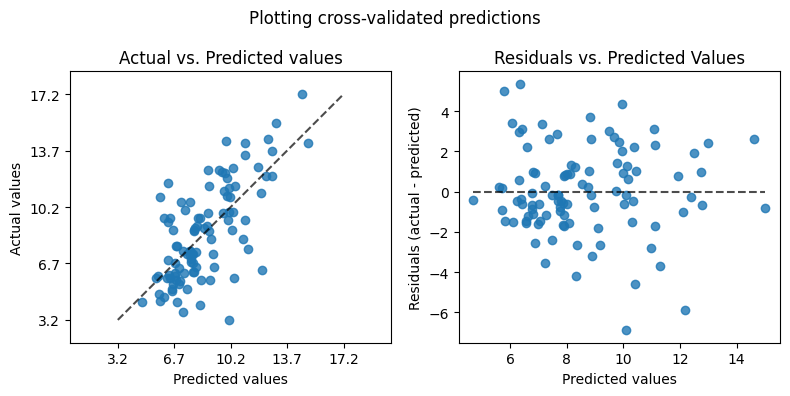

In [6]:
from src.features.tuners import RidgeHyperparameterTuner

tune(RidgeHyperparameterTuner(), X_train, y_train)